## *Spam Email Detection using TF-IDF and Logistic Regression.*

### *Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### *Data Collection and Preprocessing*

In [2]:
df = pd.read_csv('email.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['Category'].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [5]:
df.shape

(5573, 2)

In [6]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [7]:
df.duplicated().sum()

415

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.Category.value_counts()

Category
ham               4516
spam               641
{"mode":"full"       1
Name: count, dtype: int64

In [10]:
df[(df['Category'] != 'ham') & (df['Category'] != 'spam')]

,Category,Message
5572,"{""mode"":""full""",isActive:false}


In [11]:
df.drop(5572, inplace=True)

### *Visualizing the Category Distribution*

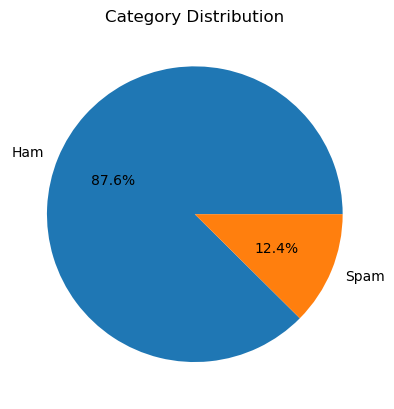

In [12]:
labels = ['Ham', 'Spam']
sizes = [4516, 641]

plt.pie(sizes,labels= labels, autopct='%0.1f%%')
plt.title("Category Distribution")
plt.show()

In [13]:
df.shape

(5157, 2)

In [14]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.tail()

,Category,Message
5152,spam,This is the 2nd time we have tried 2 contact u...
5153,ham,Will ü b going to esplanade fr home?
5154,ham,"Pity, * was in mood for that. So...any other s..."
5155,ham,The guy did some bitching but I acted like i'd...
5156,ham,Rofl. Its true to its name


### *Labeling Spam = 1 and Ham = 0*

In [17]:
df.loc[df['Category'] == 'spam', 'Category'] = 1

In [18]:
df.loc[df['Category'] == 'ham', 'Category'] = 0

In [19]:
X = df['Message']
y = df['Category']

In [20]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5152    1
5153    0
5154    0
5155    0
5156    0
Name: Category, Length: 5157, dtype: object

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
X.dtype

dtype('O')

In [23]:
y.dtype

dtype('O')

### *Splitting the dataset into the Training set and Test set*

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### *Vectorizing the textual data using TF-IDF*

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
feature_ext = TfidfVectorizer(min_df=2, max_df=0.7, stop_words='english', lowercase=True)

X_train_features = feature_ext.fit_transform(X_train)
X_test_features = feature_ext.transform(X_test)

#Since x and y are originally of dtype object, they need to be converted to integers, but x gets automatically converted during vectorization

y_train = y_train.astype('int') 
y_test = y_test.astype('int')

In [27]:
feature_names = feature_ext.get_feature_names_out()

In [28]:
feature_names

array(['00', '000', '02', ..., 'yunny', 'yup', 'zed'], dtype=object)

### *Training the Logistic Regression Model*

In [29]:
model = LogisticRegression(class_weight='balanced')

In [30]:
model.fit(X_train_features, y_train)

LogisticRegression(class_weight='balanced')

### *Predicting on Test set*

In [31]:
y_pred = model.predict(X_test_features)

### *Evaluating the model's performance*

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [33]:
acc_score = accuracy_score(y_test, y_pred)
acc_score * 100

97.38372093023256

### *Applying K-Fold Cross Validation (Evaluating across 10 splits)*

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model, X = X_train_features, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.04 %
Standard Deviation: 0.68 %


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       896
           1       0.87      0.94      0.90       136

    accuracy                           0.97      1032
   macro avg       0.93      0.96      0.94      1032
weighted avg       0.98      0.97      0.97      1032



### *Plotting the Confusion Matrix*

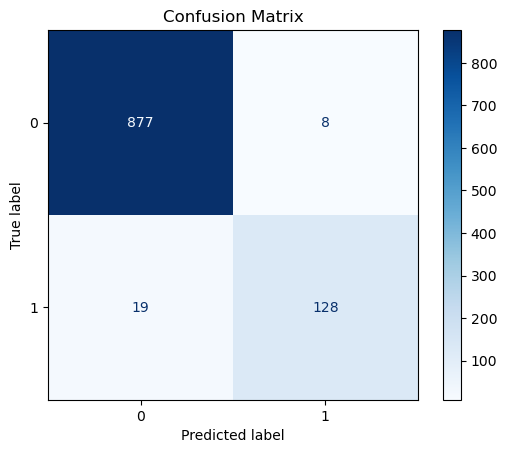

In [36]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["Category"].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### *Predicting on a single unseen input*

In [37]:
input_mail = ["""Hello,

We are currently updating our records to ensure that all accounts remain secure and fully functional. During our routine review, we noticed some of the information associated with your account appears to be incomplete or outdated. 

To avoid any interruptions in your service, please take a few minutes to review and confirm your details. This process is quick and secure, and failure to update your information could result in temporary account restrictions.  

Click the link below to update your account information now:  
http://fake-update-link.com  

We appreciate your prompt attention to this matter. If you have any questions, feel free to contact our support team.

Thank you for your cooperation,  
Customer Support Team


"""]

input_features = feature_ext.transform(input_mail)

prediction = model.predict(input_features)

print(prediction)

if prediction[0] == 0:
    print("Not Spam email.")
else:
    print("Spam email.")



[1]
Spam email.
